# Linear Model 


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, PolynomialFeatures, StandardScaler
from sklearn.svm import SVR

In [3]:
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features 
yq = wine_quality.data.targets
yc = wine_quality.data.original.color

In [4]:
Xq_train, Xq_test, yq_train, yq_test = train_test_split(
    X,
    yq,
    test_size=0.3,
    random_state=42
)

In [40]:
pipeline_q = Pipeline([
    ('scaler', QuantileTransformer()),
    ('basis_func', PolynomialFeatures(degree=3)),
    ('model', Ridge())
])

pipeline_q.fit(Xq_train, yq_train)

Pipeline(steps=[('scaler', QuantileTransformer()),
                ('basis_func', PolynomialFeatures(degree=3)),
                ('model', Ridge())])

In [66]:
yq_pred_ridge = pipeline_q.predict(Xq_test)
yq_pred_ridge

array([[6.51185926],
       [5.14510495],
       [6.9244753 ],
       ...,
       [6.74045342],
       [6.59700954],
       [5.7751113 ]])

In [51]:
def show_metrics(y_test, y_pred):
    y_test = np.array(y_test).reshape((-1, 1))
    y_pred = np.array(y_pred).reshape((-1, 1))
    mse = mean_squared_error(y_test, y_pred)
    nmse = (((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()).squeeze()
    r2 = 1 - nmse
    print(f'mean squared error = {mse:.4f}')
    print(f'normalized mean squared error = {nmse:.4f}')
    print(f'coefficient of determination r2 = {r2:.4f}')

In [67]:
show_metrics(yq_test, yq_pred_ridge)

mean squared error = 0.4601
normalized mean squared error = 0.6306
coefficient of determination r2 = 0.3694


# SVM with Quadratic Kernel

In [53]:
svm_quadratic = Pipeline([
    ('scaler', QuantileTransformer()),
    ('svr', SVR(kernel='poly', degree=2))
])

svm_quadratic.fit(Xq_train, yq_train.iloc[:, 0])

Pipeline(steps=[('scaler', QuantileTransformer()),
                ('svr', SVR(degree=2, kernel='poly'))])

In [64]:
yq_pred_svm_quad = svm_quadratic.predict(Xq_test)
yq_pred_svm_quad

array([6.09383441, 5.10506094, 6.87491137, ..., 6.84511746, 6.51756588,
       5.63203949])

In [65]:
show_metrics(yq_test, yq_pred_svm_quad)

mean squared error = 0.4505
normalized mean squared error = 0.6175
coefficient of determination r2 = 0.3825


# SVM with Cubic Kernel

In [202]:
svm_cubic = Pipeline([
    ('scaler', QuantileTransformer()),
    ('svr', SVR(kernel='poly', degree=3))
])

svm_cubic.fit(Xq_train, yq_train.iloc[:, 0])

Pipeline(steps=[('scaler', QuantileTransformer()), ('svr', SVR(kernel='poly'))])

In [203]:
yq_pred_svm_cubic = svm_cubic.predict(Xq_test)
yq_pred_svm_cubic

array([6.99655328, 5.1556131 , 6.78273478, ..., 6.69112775, 6.86108225,
       5.61943598])

In [204]:
show_metrics(yq_test, yq_pred_svm_cubic)

mean squared error = 0.4799
normalized mean squared error = 0.6577
coefficient of determination r2 = 0.3423


# SVM with RBF Kernel

In [255]:
svm_rbf = Pipeline([
    ('scaler', QuantileTransformer()),
    ('svr', SVR(kernel='rbf'))
])

svm_rbf.fit(Xq_train, yq_train.iloc[:, 0])

Pipeline(steps=[('scaler', QuantileTransformer()), ('svr', SVR())])

In [256]:
yq_pred_svm_rbf = svm_rbf.predict(Xq_test)
yq_pred_svm_rbf

array([6.09383441, 5.10506094, 6.87491137, ..., 6.84511746, 6.51756588,
       5.63203949])

In [257]:
show_metrics(yq_test, yq_pred_svm_rbf)

mean squared error = 0.4505
normalized mean squared error = 0.6175
coefficient of determination r2 = 0.3825


# Comparison

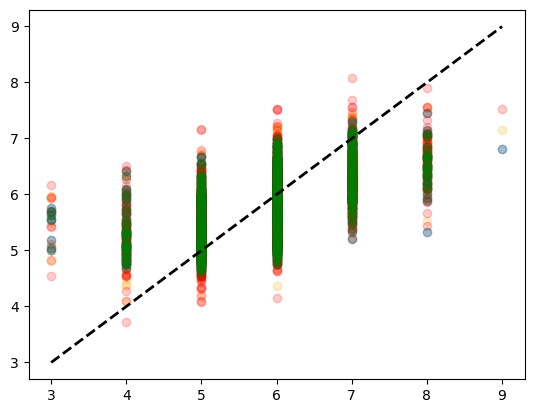

In [162]:
plt.scatter(yq_test, yq_pred_ridge, color='orange', alpha=0.2)
plt.scatter(yq_test, yq_pred_svm_quad, color='blue', alpha=0.2)
plt.scatter(yq_test, yq_pred_svm_cubic, color='red', alpha=0.2)
plt.scatter(yq_test, yq_pred_svm_rbf, color='green', alpha=0.2)
plt.plot([yq_test.min(), yq_test.max()], [yq_test.min(), yq_test.max()], 'k--', lw=2)